In [6]:
import pandas as pd
import os

In [7]:
# List of CSV file names
csv_files = [
    'BaggedTreeClassifier.csv',
    'DecisionTree.csv',
    'Fast Text - Linear Regression.csv',
    'Fast Text - Linear Regression2.csv',
    'Fast Text - train_supervised.csv',
    'Fast Text - train_supervised2.csv',
    'LGBMClassifier.csv',
    'LinearRegression.csv',
    'Logistic Regression.csv',
    'RandomForestClassifier.csv',
    'SVC.csv',
    'Word2Vec - Linear Regression.csv',
    'Word2Vec - Linear Regression2.csv',
    'XGBClassifier.csv'
]

In [8]:
# Read each CSV file and concatenate into one DataFrame
dfs = []
for file in csv_files:
    df = pd.read_csv(os.path.join('', file))
    dfs.append(df)

In [9]:
# Concatenate all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

In [10]:
# Replace NaN with 'None' in the 'Data Balancing Technique' column
combined_df['data balancing technique'] = combined_df['data balancing technique'].fillna('None')

In [11]:
combined_df.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
# Display the combined DataFrame
combined_df

,dataset,model,data balancing technique,fold,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
0,DF5,BaggedTreeClassifier,None,1,0.992366,0.994881,0.999177,0.954173,0.995760,0.974102,3643.0,611.0,3640,28,583,3
1,DF5,BaggedTreeClassifier,None,2,0.994250,0.998339,0.999725,0.966238,0.996980,0.982026,3632.0,622.0,3631,21,601,1
2,DF5,BaggedTreeClassifier,None,3,0.993674,0.998382,0.999723,0.964063,0.996690,0.980922,3614.0,640.0,3613,23,617,1
3,DF5,BaggedTreeClassifier,None,4,0.989575,0.995074,0.999169,0.940994,0.994349,0.967279,3610.0,644.0,3607,38,606,3
4,DF5,BaggedTreeClassifier,None,5,0.992572,0.991922,0.998616,0.957878,0.995585,0.974603,3613.0,641.0,3608,27,614,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,DF5,XGBClassifier,SMOTETomek,5,0.997524,1.000000,1.000000,0.985673,0.998760,0.992785,4028.0,698.0,4028,10,688,0
653,DF5,XGBClassifier,SMOTETomek,6,0.997511,1.000000,1.000000,0.986072,0.998754,0.992987,4008.0,718.0,4008,10,708,0
654,DF5,XGBClassifier,SMOTETomek,7,0.996731,1.000000,1.000000,0.982940,0.998363,0.991396,3964.0,762.0,3964,13,749,0
655,DF5,XGBClassifier,SMOTETomek,8,0.997257,1.000000,1.000000,0.984869,0.998627,0.992377,3999.0,727.0,3999,11,716,0


## Aggragating the median of the metrics grouped by the model

In [13]:
df1 = combined_df.copy()

In [14]:
df1.drop(columns=['fold','dataset','data balancing technique'], inplace=True)

In [15]:
# Assuming combined_metrics is your DataFrame containing the mentioned columns
median_metrics = df1.groupby(['model']).median().reset_index()

In [16]:
median_metrics

,model,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
0,BaggedTreeClassifier,0.994470,0.994894,0.999163,0.969318,0.996477,0.980497,3612.0,641.5,3607.0,20.0,623.0,3.0
1,DecisionTreeClassifier,0.995253,0.958767,0.992548,0.973458,0.993457,0.962790,3612.0,641.5,3578.5,17.0,624.5,27.0
2,Fast Text - Linear Regression,0.924394,0.906091,0.970313,0.870149,0.946117,0.880249,660.0,642.0,621.0,85.0,560.0,40.0
3,Fast Text - train_supervised,0.986594,0.866307,0.978033,0.932776,0.973978,0.843589,3612.0,641.5,3532.0,44.5,583.5,79.0
4,LGBMClassifier,0.997223,1.000000,1.000000,0.984436,0.998405,0.990885,3613.0,641.0,3610.0,10.0,633.0,0.0
5,Linear Regression,0.984931,0.736638,0.940601,0.920548,0.962351,0.809412,3614.0,660.0,3445.5,53.0,602.0,220.5
6,Logistic Regression,0.989960,0.925656,0.986438,0.945384,0.987793,0.932984,3612.0,641.5,3565.0,36.0,608.5,49.0
7,RandomForestClassifier,0.993122,0.998416,0.999723,0.961120,0.996259,0.978755,3612.0,641.5,3610.5,25.0,619.0,1.0
8,SVC,0.969228,0.593992,0.892746,0.874821,0.919023,0.412760,7224.0,1282.0,5453.0,123.0,584.0,967.0
9,Word2Vec - Linear Regression,0.925983,0.954012,0.988736,0.848485,0.956126,0.889201,660.0,641.5,634.5,97.5,552.5,18.5


### Standart Deviation

In [17]:
# Assuming combined_metrics is your DataFrame containing the mentioned columns
std_metrics = df1.groupby(['model']).std().reset_index()

In [18]:
std_metrics

,model,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
0,BaggedTreeClassifier,0.001441,0.006377,0.001127,0.008281,0.000695,0.004093,17.426164,17.076895,17.593977,5.270213,17.924481,4.075419
1,DecisionTreeClassifier,0.001308,0.036663,0.007445,0.007598,0.003536,0.018090,17.405105,17.056258,31.400769,4.787492,17.675122,26.901665
2,Fast Text - Linear Regression,0.036496,0.047909,0.052568,0.123631,0.043573,0.083764,2487.687880,300.615754,2479.869341,179.825376,153.669303,35.317402
3,Fast Text - train_supervised,0.023959,0.157204,0.046213,0.140043,0.028626,0.133474,17.426164,17.076895,167.666520,89.918059,91.501133,166.827408
4,LGBMClassifier,0.000784,0.002350,0.000413,0.004394,0.000383,0.002163,17.502508,17.153288,17.545895,2.840623,16.849193,1.491562
5,Linear Regression,0.018784,0.107805,0.026909,0.115525,0.006018,0.024172,188.154729,38.187362,160.099811,73.720013,89.517043,105.006002
6,Logistic Regression,0.004273,0.023849,0.004679,0.024974,0.001918,0.011176,17.426164,17.076895,24.055462,15.877390,24.444541,16.884879
7,RandomForestClassifier,0.001475,0.005654,0.000995,0.008478,0.000676,0.003995,17.426164,17.076895,17.725496,5.401899,17.409743,3.592837
8,SVC,0.050003,0.302027,0.205679,0.357772,0.117815,0.234363,3783.119081,676.403274,4132.347954,834.132725,516.290509,1158.220802
9,Word2Vec - Linear Regression,0.047234,0.049534,0.044088,0.143142,0.045043,0.104676,1410.612769,17.076895,1418.907547,92.207154,93.048502,27.514783


In [19]:
import matplotlib.pyplot as plt
import numpy as np

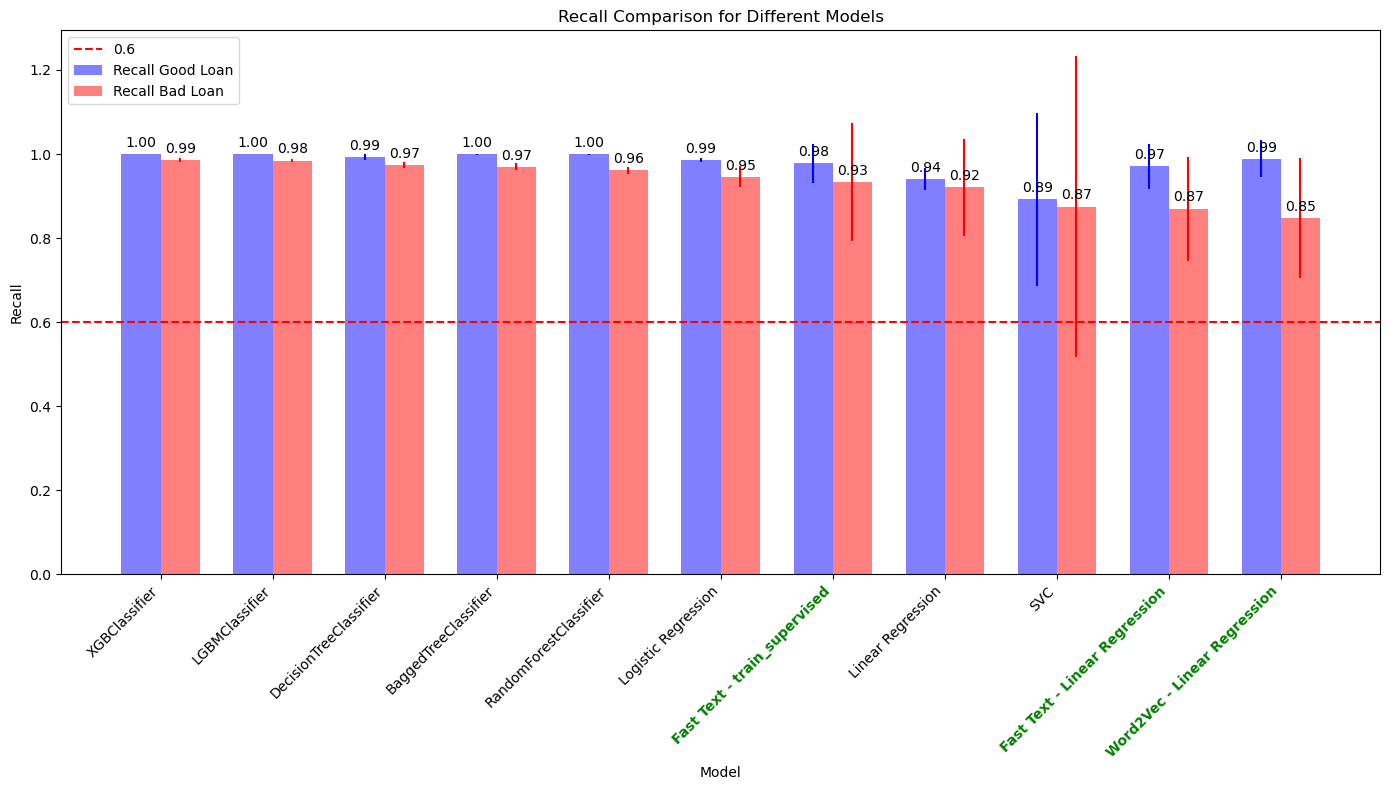

In [22]:
# Sort the DataFrame by recall_2
median_metrics_sorted = median_metrics.sort_values(by='recall_2', ascending=False)

# Set the figure size
plt.figure(figsize=(14, 8))

# Set the width of the bars
bar_width = 0.35

# Set the positions for the bars based on the sorted DataFrame
x = np.arange(len(median_metrics_sorted.model))

# Plot recall_1
plt.bar(x - bar_width/2, median_metrics_sorted['recall_1'], bar_width, color='b', alpha=0.5, label='Recall Good Loan')

# Plot recall_2
plt.bar(x + bar_width/2, median_metrics_sorted['recall_2'], bar_width, color='r', alpha=0.5, label='Recall Bad Loan')

# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')

# Calculate error bars for standard deviation
std_dev_recall_1 = std_metrics['recall_1'].loc[median_metrics_sorted.index]
std_dev_recall_2 = std_metrics['recall_2'].loc[median_metrics_sorted.index]

# Add error bars for standard deviation
plt.errorbar(x - bar_width/2, median_metrics_sorted['recall_1'], yerr=std_dev_recall_1, fmt='none', color='b')
plt.errorbar(x + bar_width/2, median_metrics_sorted['recall_2'], yerr=std_dev_recall_2, fmt='none', color='r')

# Set x-axis labels
plt.xticks(x, median_metrics_sorted.model, rotation=45, ha='right')

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall Comparison for Different Models')

# Highlight specific values on the x-axis
highlighted_indices = [6, 9, 10]

# Bold and/or color specific tick labels
for i, tick_label in enumerate(plt.gca().get_xticklabels()):
    if i in highlighted_indices:
        tick_label.set_fontweight('bold')
        tick_label.set_color('green')

# Add values on top of the bars
for i, value in enumerate(median_metrics_sorted['recall_1']):
    plt.text(i - bar_width/2, value + 0.01, f'{value:.2f}', ha='center', va='bottom', color='black')
for i, value in enumerate(median_metrics_sorted['recall_2']):
    plt.text(i + bar_width/2, value + 0.01, f'{value:.2f}', ha='center', va='bottom', color='black')

# Show legend on the top left corner
plt.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

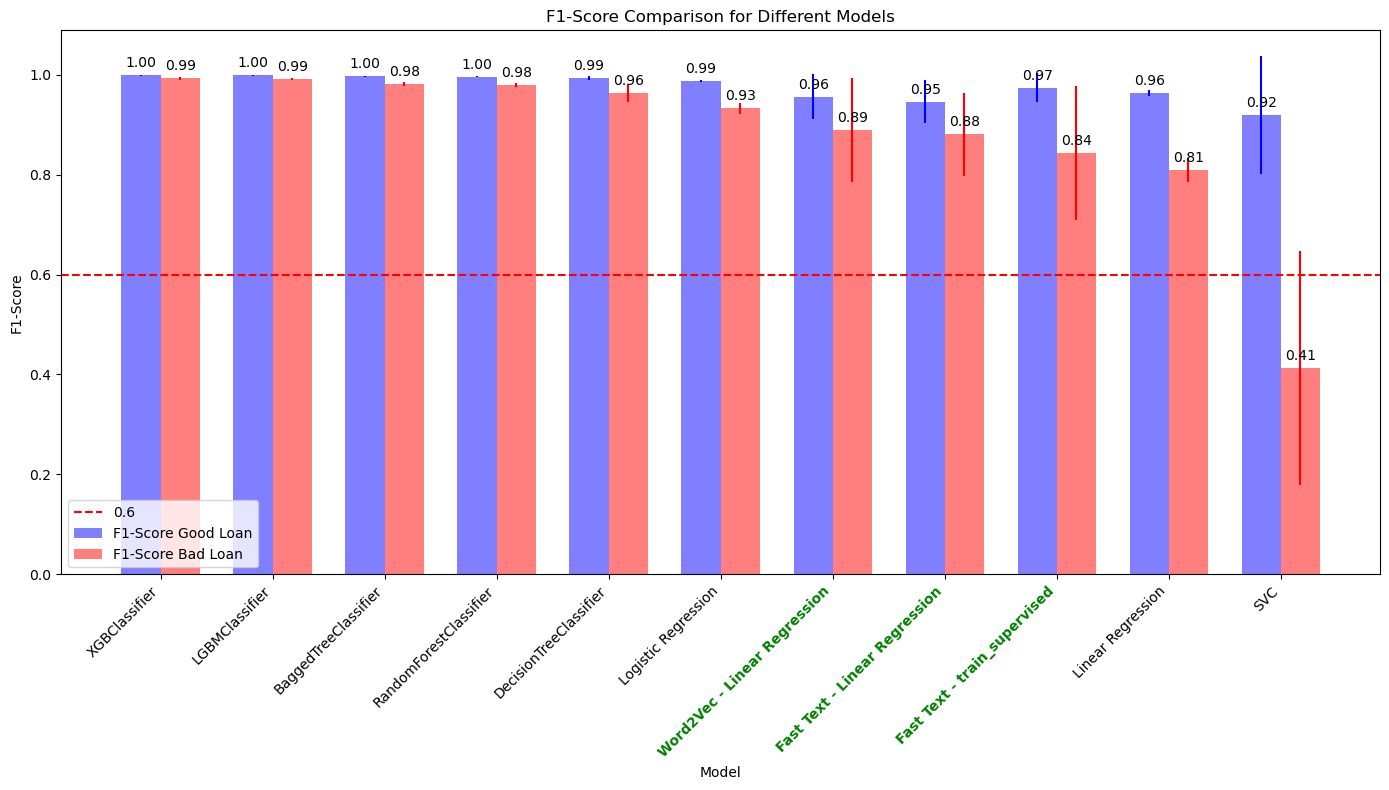

In [24]:
# Sort the DataFrame by recall_2
median_metrics_sorted = median_metrics.sort_values(by='f1-score_2', ascending=False)

# Set the figure size
plt.figure(figsize=(14, 8))

# Set the width of the bars
bar_width = 0.35

# Set the positions for the bars based on the sorted DataFrame
x = np.arange(len(median_metrics_sorted.model))

# Plot f1-score_1
plt.bar(x - bar_width/2, median_metrics_sorted['f1-score_1'], bar_width, color='b', alpha=0.5, label='F1-Score Good Loan')

# Plot f1-score_2
plt.bar(x + bar_width/2, median_metrics_sorted['f1-score_2'], bar_width, color='r', alpha=0.5, label='F1-Score Bad Loan')

# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')

# Calculate error bars for standard deviation
std_dev_f1_score_1 = std_metrics['f1-score_1'].loc[median_metrics_sorted.index]
std_dev_f1_score_2 = std_metrics['f1-score_2'].loc[median_metrics_sorted.index]

# Add error bars for standard deviation
plt.errorbar(x - bar_width/2, median_metrics_sorted['f1-score_1'], yerr=std_dev_f1_score_1, fmt='none', color='b')
plt.errorbar(x + bar_width/2, median_metrics_sorted['f1-score_2'], yerr=std_dev_f1_score_2, fmt='none', color='r')

# Set x-axis labels
plt.xticks(x, median_metrics_sorted.model, rotation=45, ha='right')

# Set labels and title
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison for Different Models')

# Highlight specific values on the x-axis
highlighted_indices = [6, 7, 8]

# Bold and/or color specific tick labels
for i, tick_label in enumerate(plt.gca().get_xticklabels()):
    if i in highlighted_indices:
        tick_label.set_fontweight('bold')
        tick_label.set_color('green')

# Add values on top of the bars
for i, value in enumerate(median_metrics_sorted['f1-score_1']):
    plt.text(i - bar_width/2, value + 0.01, f'{value:.2f}', ha='center', va='bottom', color='black')
for i, value in enumerate(median_metrics_sorted['f1-score_2']):
    plt.text(i + bar_width/2, value + 0.01, f'{value:.2f}', ha='center', va='bottom', color='black')

# Show legend on the top left corner
plt.legend(loc='lower left')

# Show plot
plt.tight_layout()
plt.show()

## Aggragating the median of the metrics grouped by the model and data balancing method

In [25]:
df2 = combined_df.copy()

In [26]:
df2.drop(columns=['fold','dataset'], inplace=True)

In [27]:
# Assuming combined_metrics is your DataFrame containing the mentioned columns
mean_metrics = df2.groupby(['model', 'data balancing technique']).median().reset_index()

# Drop the 'fold' column as it's not needed for the mean calculation
#mean_metrics.drop(columns=['fold','dataset'], inplace=True) #,'dataset'
#print(mean_metrics)

In [28]:
mean_metrics.head(2)

,model,data balancing technique,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
0,BaggedTreeClassifier,None,0.992682,0.996870,0.999445,0.958627,0.996111,0.978441,3612.0,641.5,3608.5,26.5,615.5,2.0
1,BaggedTreeClassifier,Random Over Sampler,0.994626,0.992308,0.998612,0.970500,0.996604,0.981032,3612.0,641.5,3605.0,19.5,625.5,5.0


In [29]:
# Assuming combined_metrics is your DataFrame containing the mentioned columns
std_metrics1 = df2.groupby(['model', 'data balancing technique']).std().reset_index()

In [30]:
std_metrics1.head(2)

,model,data balancing technique,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
0,BaggedTreeClassifier,None,0.001260,0.002310,0.000391,0.007001,0.000726,0.004240,18.215073,17.849992,17.957048,4.589844,17.410086,1.414214
1,BaggedTreeClassifier,Random Over Sampler,0.001294,0.003454,0.000609,0.007575,0.000583,0.003547,18.215073,17.849992,18.289341,4.738729,18.887091,2.201010


In [31]:
import seaborn as sns

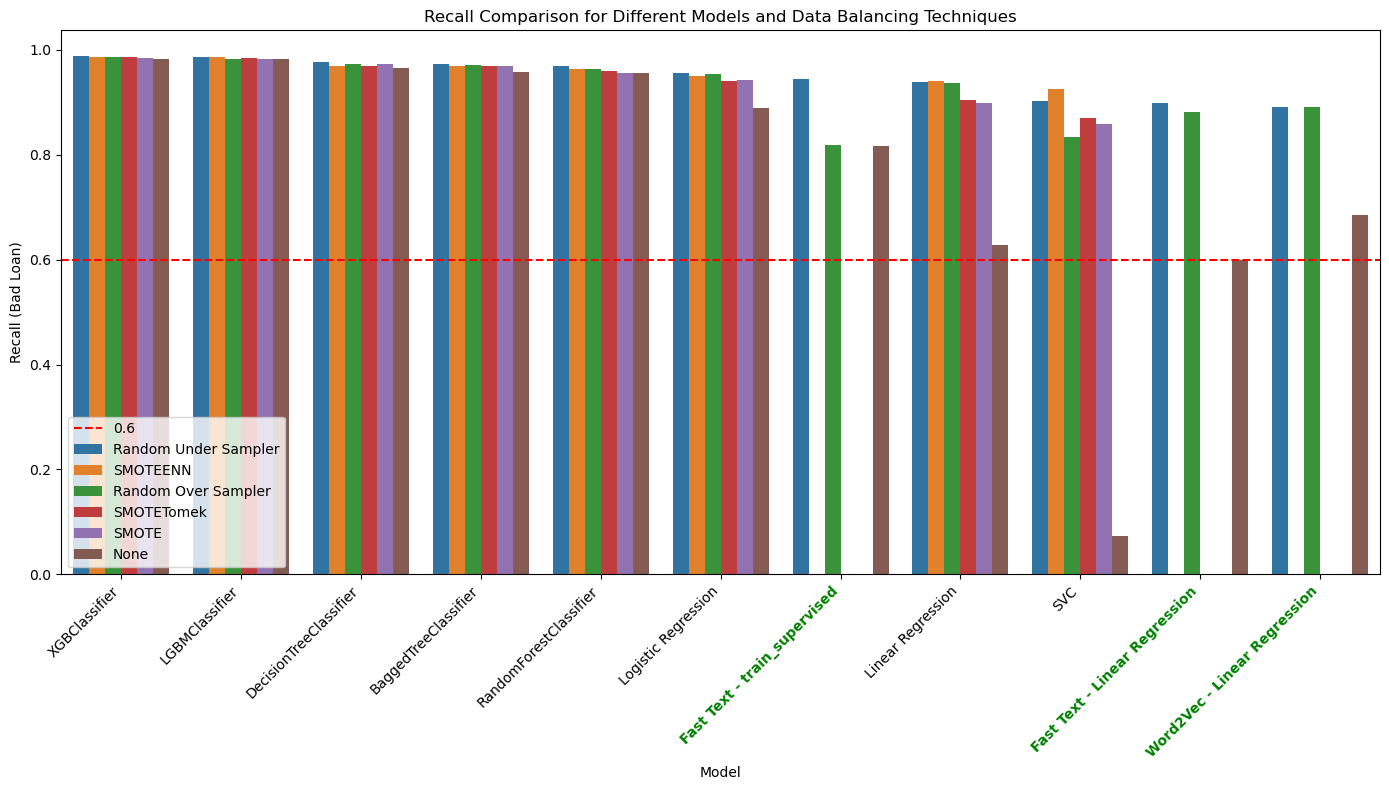

In [39]:
# Sort the DataFrame by recall_2
mean_metrics_sorted = mean_metrics.sort_values(by='recall_2', ascending=False)

# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the barplot
ax = sns.barplot(data=mean_metrics_sorted, x='model', y='recall_2', hue='data balancing technique')

# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Recall (Bad Loan)')
plt.title('Recall Comparison for Different Models and Data Balancing Techniques')

# Tilt the x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Highlight specific models on the x-axis
highlighted_indices = [6, 9, 10]  # Adjust indices as needed
for i, tick_label in enumerate(ax.get_xticklabels()):
    if i in highlighted_indices:
        tick_label.set_fontweight('bold')
        tick_label.set_color('green')

# Show legend on the top left corner
plt.legend(loc='lower left')

# Show plot
plt.tight_layout()
plt.show()

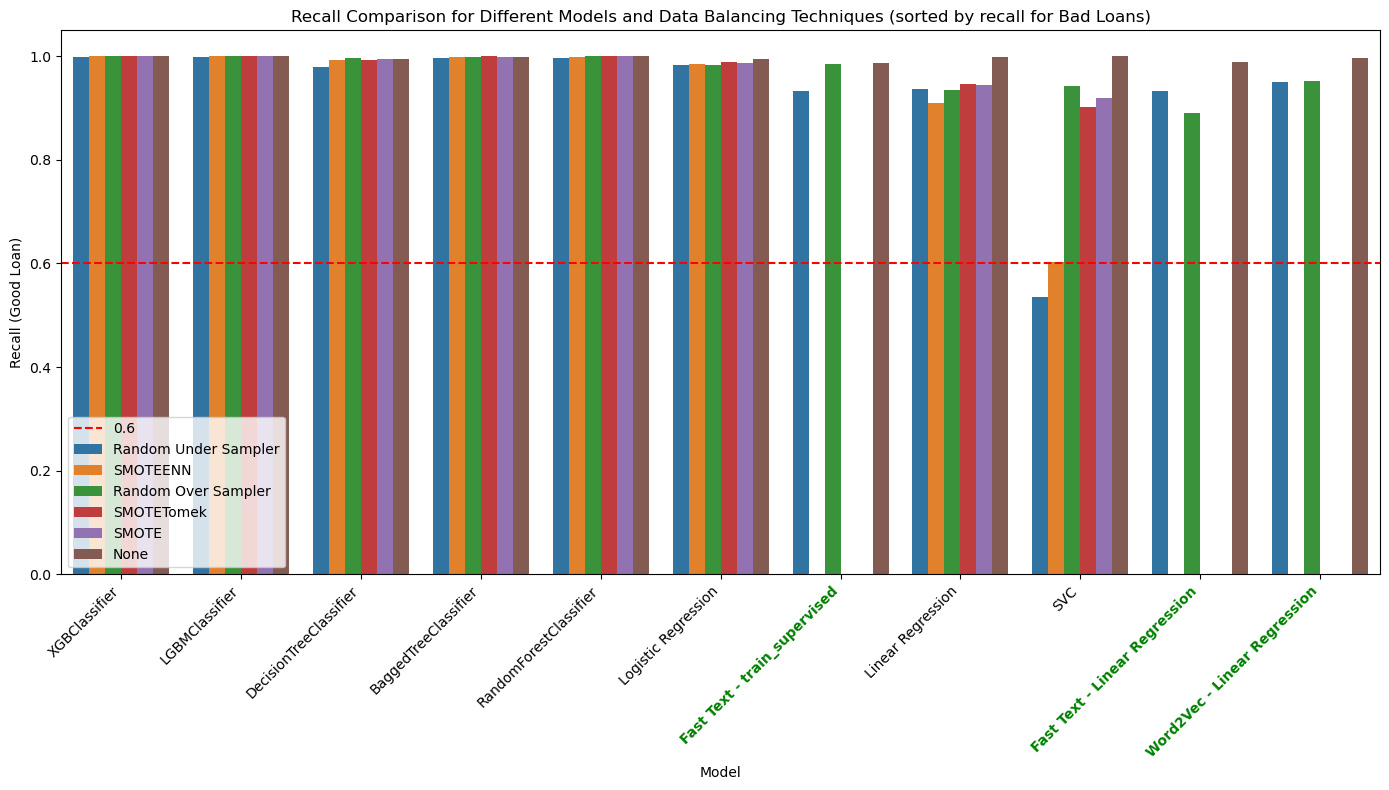

In [40]:
# Sort the DataFrame by recall_2
mean_metrics_sorted = mean_metrics.sort_values(by='recall_2', ascending=False)

# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the barplot
ax = sns.barplot(data=mean_metrics_sorted, x='model', y='recall_1', hue='data balancing technique')

# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Recall (Good Loan)')
plt.title('Recall Comparison for Different Models and Data Balancing Techniques (sorted by recall for Bad Loans)')

# Tilt the x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Highlight specific models on the x-axis
highlighted_indices = [6, 9, 10]  # Adjust indices as needed
for i, tick_label in enumerate(ax.get_xticklabels()):
    if i in highlighted_indices:
        tick_label.set_fontweight('bold')
        tick_label.set_color('green')

# Show legend on the top left corner
plt.legend(loc='lower left')

# Show plot
plt.tight_layout()
plt.show()

In [41]:
## F1-score

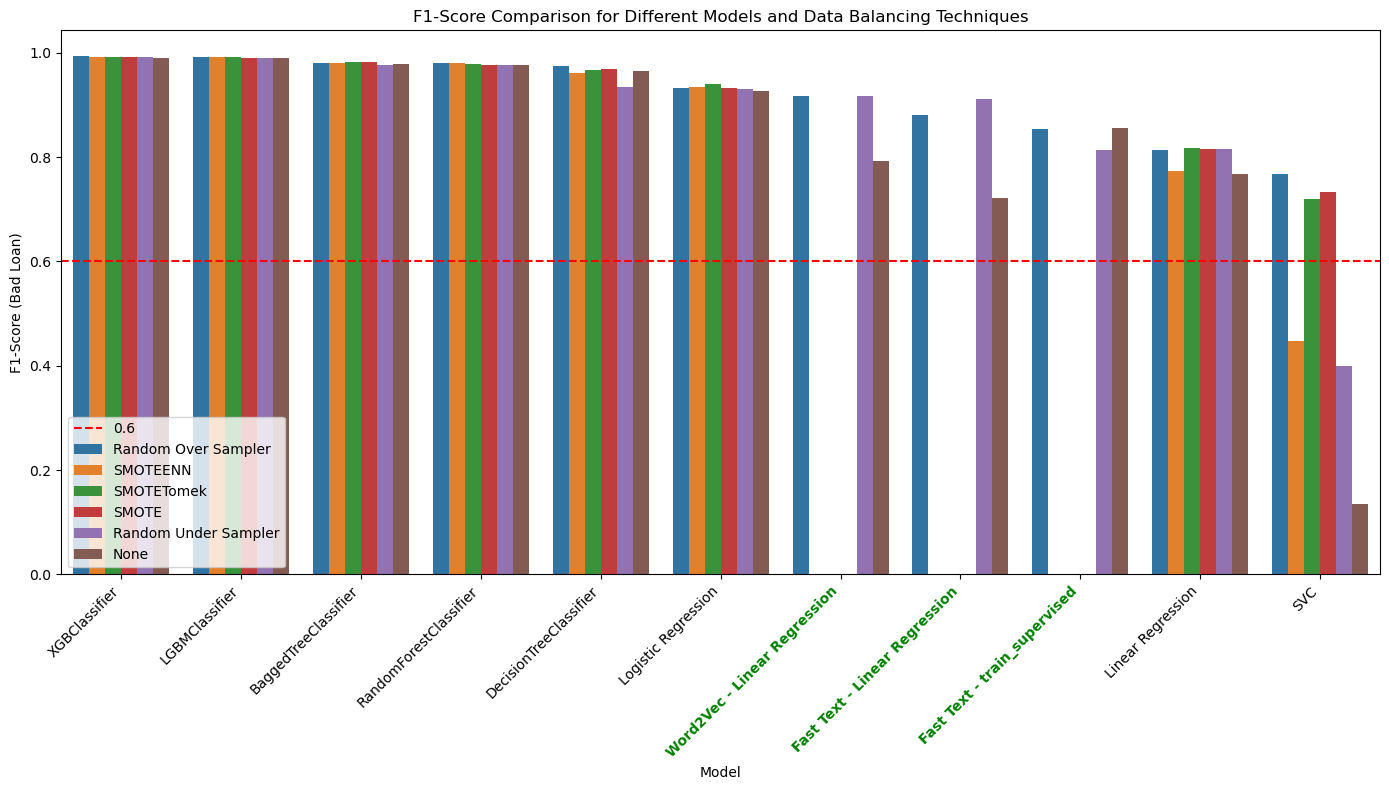

In [42]:
# Sort the DataFrame by f1-score_2
mean_metrics_sorted = mean_metrics.sort_values(by='f1-score_2', ascending=False)

# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the barplot
ax = sns.barplot(data=mean_metrics_sorted, x='model', y='f1-score_2', hue='data balancing technique')

# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')

# Set labels and title
plt.xlabel('Model')
plt.ylabel('F1-Score (Bad Loan)')
plt.title('F1-Score Comparison for Different Models and Data Balancing Techniques')

# Tilt the x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Highlight specific models on the x-axis
highlighted_indices = [6, 7, 8]  # Adjust indices as needed
for i, tick_label in enumerate(ax.get_xticklabels()):
    if i in highlighted_indices:
        tick_label.set_fontweight('bold')
        tick_label.set_color('green')

# Show legend on the top left corner
plt.legend(loc='lower left')

# Show plot
plt.tight_layout()
plt.show()

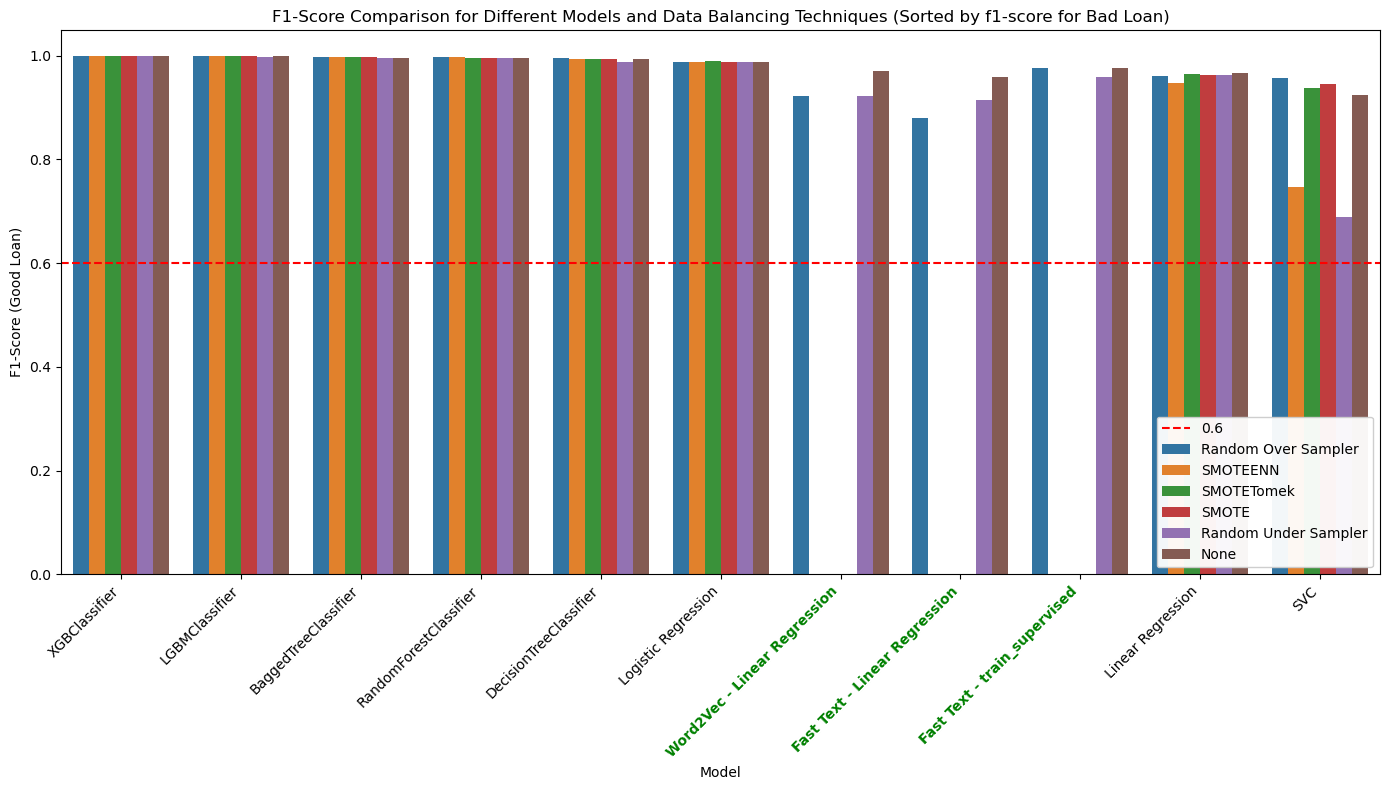

In [45]:
# Sort the DataFrame by f1-score_2
mean_metrics_sorted = mean_metrics.sort_values(by='f1-score_2', ascending=False)

# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the barplot
ax = sns.barplot(data=mean_metrics_sorted, x='model', y='f1-score_1', hue='data balancing technique')

# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')

# Set labels and title
plt.xlabel('Model')
plt.ylabel('F1-Score (Good Loan)')
plt.title('F1-Score Comparison for Different Models and Data Balancing Techniques (Sorted by f1-score for Bad Loan)')

# Tilt the x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Highlight specific models on the x-axis
highlighted_indices = [7, 8, 6]  # Adjust indices as needed
for i, tick_label in enumerate(ax.get_xticklabels()):
    if i in highlighted_indices:
        tick_label.set_fontweight('bold')
        tick_label.set_color('green')

# Move legend to the bottom right corner with less transparent background
plt.legend(loc='lower right', framealpha=0.95)

# Show plot
plt.tight_layout()
plt.show()

## Focusing on the Word Embedding models and the Databalancing

In [46]:
df3 = df2[(df2['model'].isin(['Fast Text - Linear Regression', 'Fast Text - train_supervised', 'Word2Vec - Linear Regression']))] #& (df2['data balancing technique'] != 'None')

In [47]:
df3.head(2)

,model,data balancing technique,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
130,Fast Text - Linear Regression,None,0.927109,0.902572,0.989653,0.551954,0.957361,0.685004,12081.0,2098.0,11956,940,1158,125
131,Fast Text - Linear Regression,None,0.929642,0.890671,0.987557,0.575601,0.957725,0.699285,12055.0,2123.0,11905,901,1222,150


In [48]:
# Assuming combined_metrics is your DataFrame containing the mentioned columns
df3_median = df3.groupby(['model', 'data balancing technique']).median().reset_index()

In [49]:
df3_median

,model,data balancing technique,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
0,Fast Text - Linear Regression,None,0.931347,0.910377,0.989813,0.600000,0.959690,0.722628,3613.0,642.0,3595.0,264.0,511.0,37.0
1,Fast Text - Linear Regression,Random Over Sampler,0.882039,0.886324,0.889790,0.881424,0.880659,0.880976,641.5,641.5,577.0,76.5,573.0,68.5
2,Fast Text - Linear Regression,Random Under Sampler,0.900273,0.930259,0.932065,0.899560,0.914015,0.910801,641.5,641.5,595.0,65.0,577.0,42.0
3,Fast Text - train_supervised,None,0.968094,0.908961,0.986473,0.816634,0.976858,0.856595,3612.0,641.5,3555.5,118.0,515.5,48.5
4,Fast Text - train_supervised,Random Over Sampler,0.968531,0.903169,0.985081,0.818328,0.976434,0.854601,3612.0,641.5,3553.0,116.5,517.0,53.5
5,Fast Text - train_supervised,Random Under Sampler,0.988746,0.732704,0.932256,0.944864,0.958288,0.813894,3612.0,641.5,3372.5,36.5,601.0,246.5
6,Word2Vec - Linear Regression,None,0.947014,0.962864,0.996380,0.684986,0.969912,0.792195,3612.0,641.5,3591.5,202.0,434.0,13.0
7,Word2Vec - Linear Regression,Random Over Sampler,0.896252,0.948254,0.951446,0.891980,0.922591,0.917636,641.5,641.5,608.5,66.5,568.5,32.0
8,Word2Vec - Linear Regression,Random Under Sampler,0.896449,0.945973,0.950935,0.890978,0.922980,0.918159,641.5,641.5,608.0,68.5,570.5,31.5


In [50]:
# Assuming combined_metrics is your DataFrame containing the mentioned columns
df3_std = df3.groupby(['model', 'data balancing technique']).std().reset_index()

In [51]:
df3_median

,model,data balancing technique,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
0,Fast Text - Linear Regression,None,0.931347,0.910377,0.989813,0.600000,0.959690,0.722628,3613.0,642.0,3595.0,264.0,511.0,37.0
1,Fast Text - Linear Regression,Random Over Sampler,0.882039,0.886324,0.889790,0.881424,0.880659,0.880976,641.5,641.5,577.0,76.5,573.0,68.5
2,Fast Text - Linear Regression,Random Under Sampler,0.900273,0.930259,0.932065,0.899560,0.914015,0.910801,641.5,641.5,595.0,65.0,577.0,42.0
3,Fast Text - train_supervised,None,0.968094,0.908961,0.986473,0.816634,0.976858,0.856595,3612.0,641.5,3555.5,118.0,515.5,48.5
4,Fast Text - train_supervised,Random Over Sampler,0.968531,0.903169,0.985081,0.818328,0.976434,0.854601,3612.0,641.5,3553.0,116.5,517.0,53.5
5,Fast Text - train_supervised,Random Under Sampler,0.988746,0.732704,0.932256,0.944864,0.958288,0.813894,3612.0,641.5,3372.5,36.5,601.0,246.5
6,Word2Vec - Linear Regression,None,0.947014,0.962864,0.996380,0.684986,0.969912,0.792195,3612.0,641.5,3591.5,202.0,434.0,13.0
7,Word2Vec - Linear Regression,Random Over Sampler,0.896252,0.948254,0.951446,0.891980,0.922591,0.917636,641.5,641.5,608.5,66.5,568.5,32.0
8,Word2Vec - Linear Regression,Random Under Sampler,0.896449,0.945973,0.950935,0.890978,0.922980,0.918159,641.5,641.5,608.0,68.5,570.5,31.5


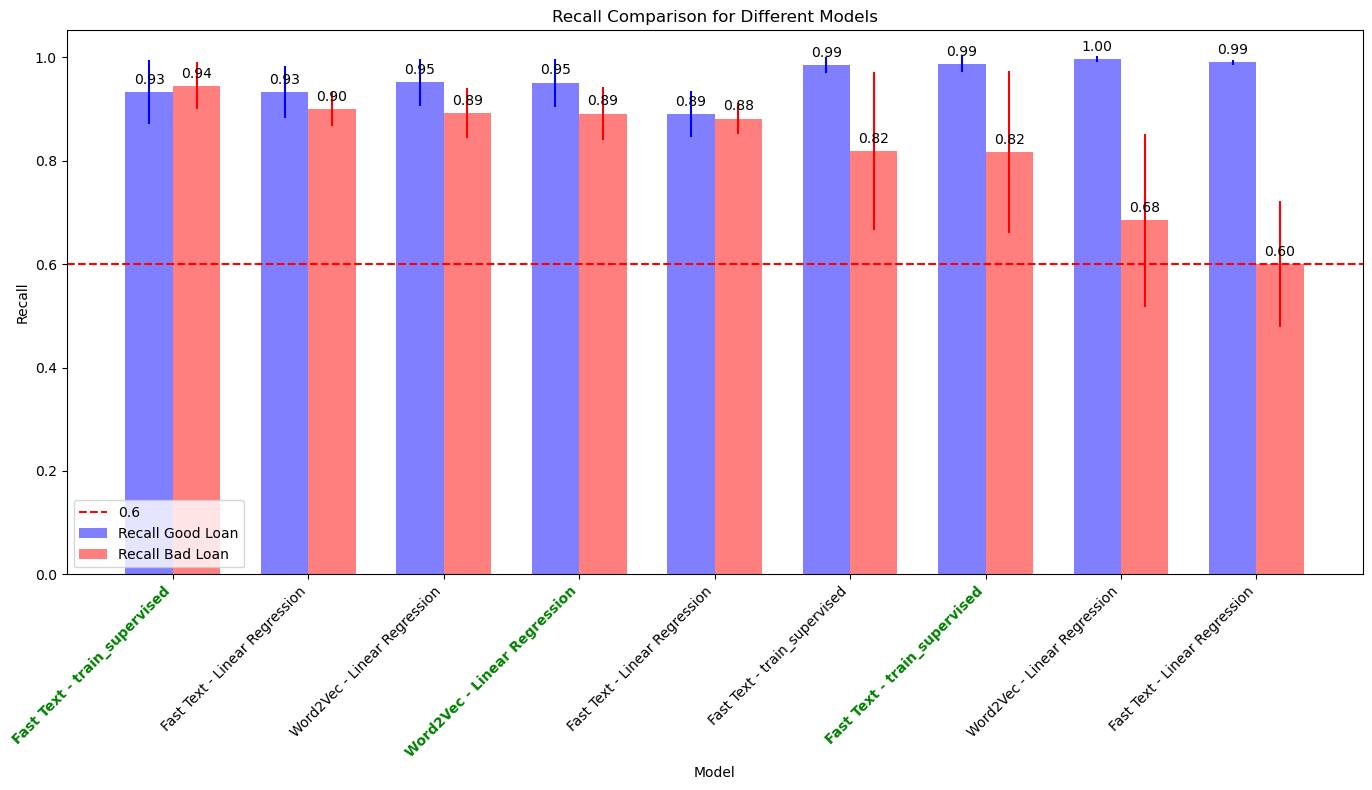

In [74]:
# Sort the DataFrame by recall_2
median_metrics_sorted = df3_median.sort_values(by='recall_2', ascending=False)

# Set the figure size
plt.figure(figsize=(14, 8))

# Set the width of the bars
bar_width = 0.35

# Set the positions for the bars based on the sorted DataFrame
x = np.arange(len(median_metrics_sorted.model))

# Plot recall_1
plt.bar(x - bar_width/2, median_metrics_sorted['recall_1'], bar_width, color='b', alpha=0.5, label='Recall Good Loan')

# Plot recall_2
plt.bar(x + bar_width/2, median_metrics_sorted['recall_2'], bar_width, color='r', alpha=0.5, label='Recall Bad Loan')

# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')

# Calculate error bars for standard deviation
std_dev_recall_1 = df3_std['recall_1'].loc[median_metrics_sorted.index]
std_dev_recall_2 = df3_std['recall_2'].loc[median_metrics_sorted.index]

# Add error bars for standard deviation
plt.errorbar(x - bar_width/2, median_metrics_sorted['recall_1'], yerr=std_dev_recall_1, fmt='none', color='b')
plt.errorbar(x + bar_width/2, median_metrics_sorted['recall_2'], yerr=std_dev_recall_2, fmt='none', color='r')

# Set x-axis labels
plt.xticks(x, median_metrics_sorted.model, rotation=45, ha='right')

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall Comparison for Different Models')

# Highlight specific values on the x-axis
highlighted_indices = [0, 3, 6]

# Bold and/or color specific tick labels
for i, tick_label in enumerate(plt.gca().get_xticklabels()):
    if i in highlighted_indices:
        tick_label.set_fontweight('bold')
        tick_label.set_color('green')

# Add values on top of the bars
for i, value in enumerate(median_metrics_sorted['recall_1']):
    plt.text(i - bar_width/2, value + 0.01, f'{value:.2f}', ha='center', va='bottom', color='black')
for i, value in enumerate(median_metrics_sorted['recall_2']):
    plt.text(i + bar_width/2, value + 0.01, f'{value:.2f}', ha='center', va='bottom', color='black')

# Show legend on the top left corner
plt.legend(loc='lower left')

# Show plot
plt.tight_layout()
plt.show()

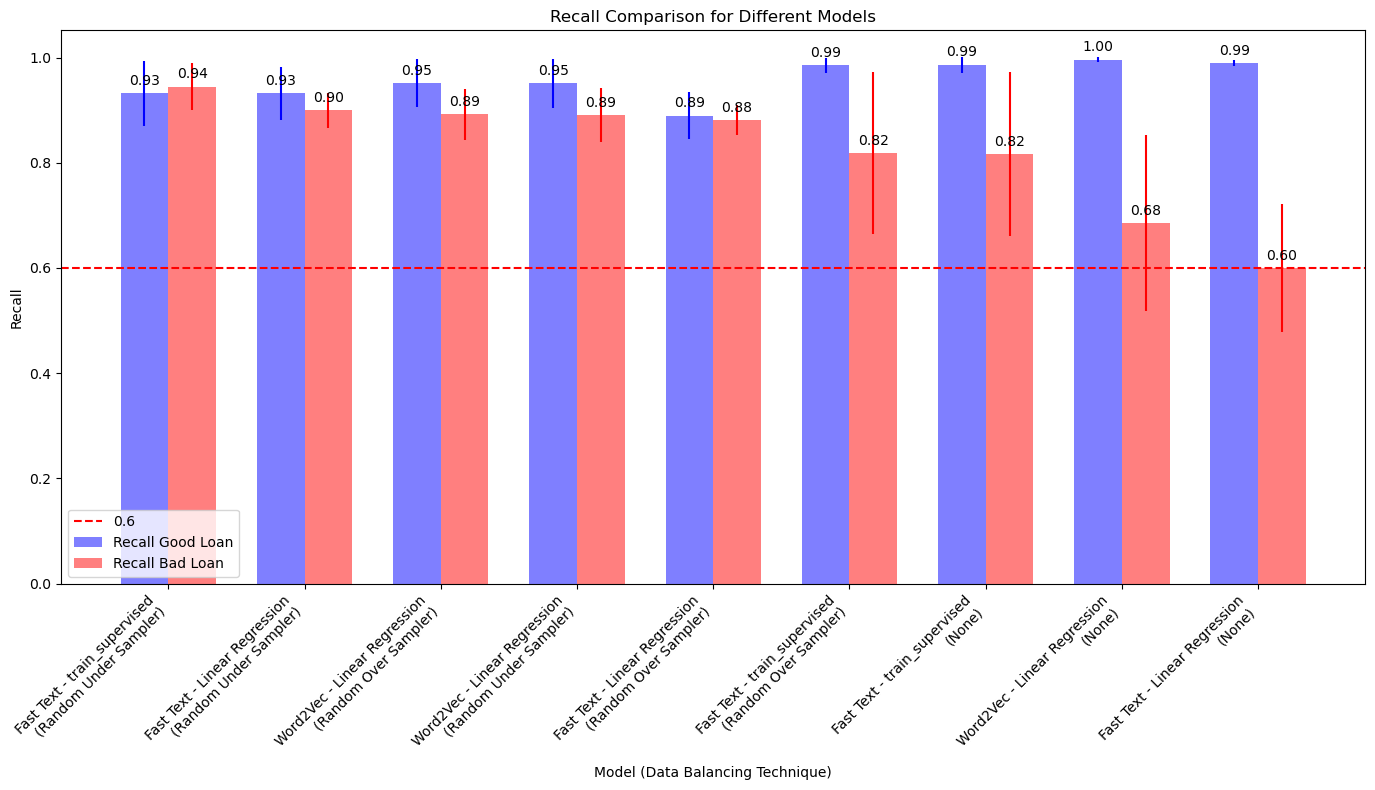

In [76]:
# Sort the DataFrame by recall_2
median_metrics_sorted = df3_median.sort_values(by='recall_2', ascending=False)

# Set the figure size
plt.figure(figsize=(14, 8))

# Set the width of the bars
bar_width = 0.35

# Set the positions for the bars based on the sorted DataFrame
x = np.arange(len(median_metrics_sorted.model))

# Plot recall_1
plt.bar(x - bar_width/2, median_metrics_sorted['recall_1'], bar_width, color='b', alpha=0.5, label='Recall Good Loan')

# Plot recall_2
plt.bar(x + bar_width/2, median_metrics_sorted['recall_2'], bar_width, color='r', alpha=0.5, label='Recall Bad Loan')

# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')

# Calculate error bars for standard deviation
std_dev_recall_1 = df3_std['recall_1'].loc[median_metrics_sorted.index]
std_dev_recall_2 = df3_std['recall_2'].loc[median_metrics_sorted.index]

# Add error bars for standard deviation
plt.errorbar(x - bar_width/2, median_metrics_sorted['recall_1'], yerr=std_dev_recall_1, fmt='none', color='b')
plt.errorbar(x + bar_width/2, median_metrics_sorted['recall_2'], yerr=std_dev_recall_2, fmt='none', color='r')

# Set x-axis labels
xtick_labels = [f'{model}\n({technique})' for model, technique in zip(median_metrics_sorted['model'], median_metrics_sorted['data balancing technique'])]
plt.xticks(x, xtick_labels, rotation=45, ha='right')

# Set labels and title
plt.xlabel('Model (Data Balancing Technique)')
plt.ylabel('Recall')
plt.title('Recall Comparison for Different Models')

# Highlight specific values on the x-axis
highlighted_indices = [0, 3, 6]


# Add values on top of the bars
for i, value in enumerate(median_metrics_sorted['recall_1']):
    plt.text(i - bar_width/2, value + 0.01, f'{value:.2f}', ha='center', va='bottom', color='black')
for i, value in enumerate(median_metrics_sorted['recall_2']):
    plt.text(i + bar_width/2, value + 0.01, f'{value:.2f}', ha='center', va='bottom', color='black')

# Show legend on the top left corner
plt.legend(loc='lower left')

# Show plot
plt.tight_layout()
plt.show()

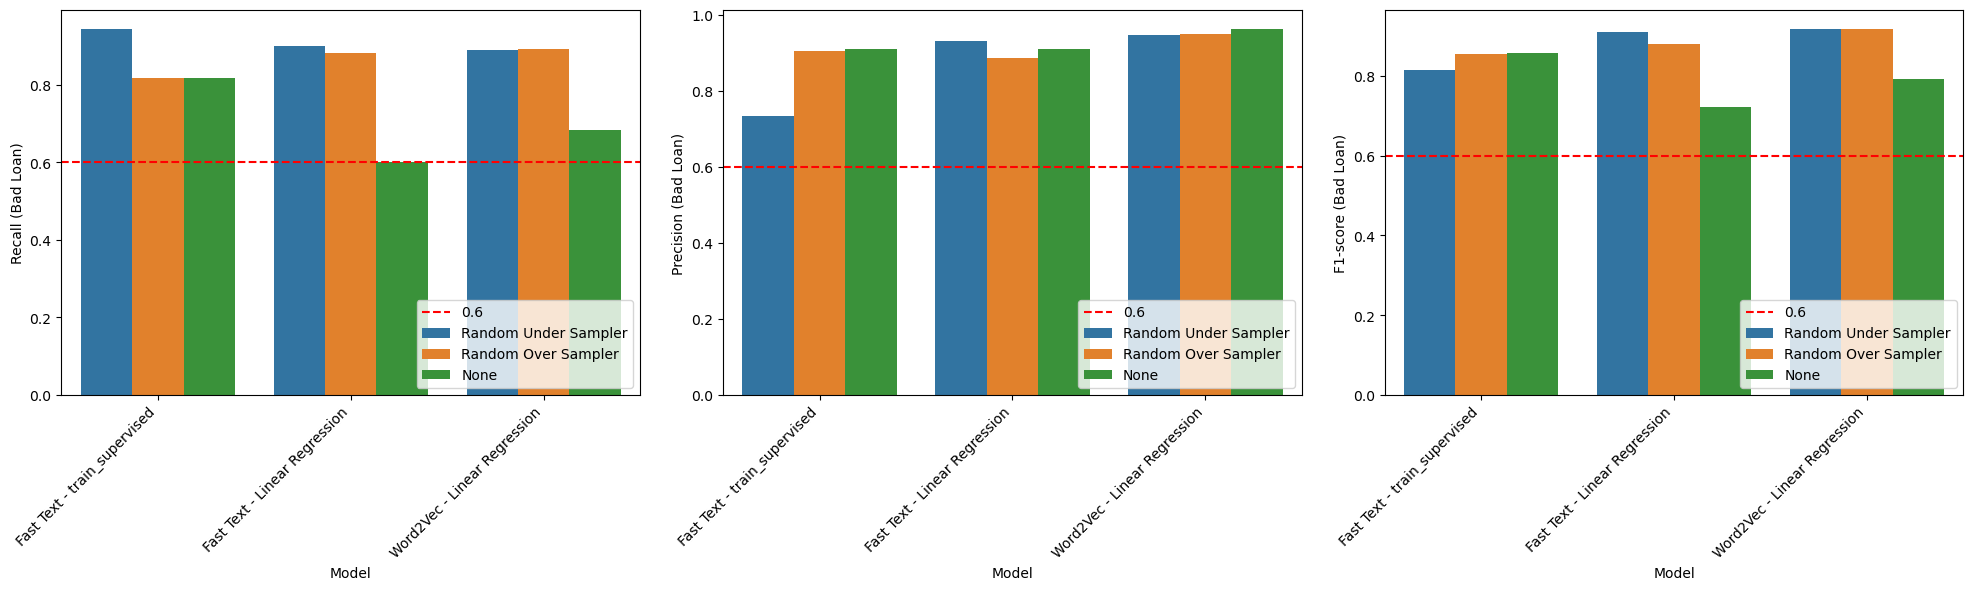

In [53]:
# Sort the DataFrame by recall_2
mean_metrics_sorted = df3_median.sort_values(by='recall_2', ascending=False)

# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the barplot for recall_2
plt.subplot(1, 3, 1)
ax1 = sns.barplot(data=mean_metrics_sorted, x='model', y='recall_2', hue='data balancing technique')
# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')
# Set labels and title
plt.xlabel('Model')
plt.ylabel('Recall (Bad Loan)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

plt.legend(loc='lower right')

# Plot the barplot for precision_2
plt.subplot(1, 3, 2)
ax2 = sns.barplot(data=mean_metrics_sorted, x='model', y='precision_2', hue='data balancing technique')
# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')
# Set labels and title
plt.xlabel('Model')
plt.ylabel('Precision (Bad Loan)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Show legend on the top left corner
plt.legend(loc='lower right')

# Plot the barplot for f1-score_2
plt.subplot(1, 3, 3)
ax3 = sns.barplot(data=mean_metrics_sorted, x='model', y='f1-score_2', hue='data balancing technique')
# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')
# Set labels and title
plt.xlabel('Model')
plt.ylabel('F1-score (Bad Loan)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

plt.legend(loc='lower right')

# Show plot
plt.tight_layout()
plt.show()

## Focusing on the difference from the Dataset structure

In [54]:
df4 = combined_df[(combined_df['model'].isin(['Fast Text - Linear Regression', 'Fast Text - train_supervised', 'Word2Vec - Linear Regression']))] #& (df2['data balancing technique'] != 'None')

In [55]:
df4.head(2)

,dataset,model,data balancing technique,fold,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
130,DF7,Fast Text - Linear Regression,None,1,0.927109,0.902572,0.989653,0.551954,0.957361,0.685004,12081.0,2098.0,11956,940,1158,125
131,DF7,Fast Text - Linear Regression,None,2,0.929642,0.890671,0.987557,0.575601,0.957725,0.699285,12055.0,2123.0,11905,901,1222,150


In [56]:
df4['dataset'].unique()

array(['DF7', 'DF8', 'DF2'], dtype=object)

In [57]:
#df2 and df7 - Raw Data

In [58]:
#df8 - Labeled Data

In [59]:
# Replace values in df4
df4['dataset'] = df4['dataset'].replace({'DF7': 'Raw Data', 'DF2': 'Raw Data', 'DF8': 'Labeled Data'})

C:\Users\albbr\AppData\Local\Temp\ipykernel_43840\2941823276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['dataset'] = df4['dataset'].replace({'DF7': 'Raw Data', 'DF2': 'Raw Data', 'DF8': 'Labeled Data'})


In [60]:
df4.head(2)

,dataset,model,data balancing technique,fold,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
130,Raw Data,Fast Text - Linear Regression,None,1,0.927109,0.902572,0.989653,0.551954,0.957361,0.685004,12081.0,2098.0,11956,940,1158,125
131,Raw Data,Fast Text - Linear Regression,None,2,0.929642,0.890671,0.987557,0.575601,0.957725,0.699285,12055.0,2123.0,11905,901,1222,150


In [61]:
df4_1 = df4[(df4['dataset'].isin(['Labeled Data']))]

In [62]:
# Assuming combined_metrics is your DataFrame containing the mentioned columns
df4_1_median = df4_1.groupby(['dataset','model', 'data balancing technique']).median().reset_index()

In [63]:
df4_1_median

,dataset,model,data balancing technique,fold,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
0,Labeled Data,Fast Text - Linear Regression,None,5.5,0.966183,0.992530,0.998889,0.806773,0.982389,0.889359,3612.0,641.5,3607.0,126.5,527.0,4.0
1,Labeled Data,Fast Text - Linear Regression,Random Over Sampler,5.5,0.927989,0.970727,0.971491,0.924361,0.952686,0.949713,641.5,641.5,629.0,49.5,601.0,18.0
2,Labeled Data,Fast Text - Linear Regression,Random Under Sampler,5.5,0.930235,0.973789,0.975039,0.926714,0.953132,0.950713,641.5,641.5,627.0,48.0,602.5,16.0
3,Labeled Data,Fast Text - train_supervised,None,5.5,0.992163,0.991316,0.998477,0.955522,0.995364,0.973436,3612.0,641.5,3604.5,28.5,616.0,5.5
4,Labeled Data,Fast Text - train_supervised,Random Over Sampler,5.5,0.992981,0.986794,0.997648,0.960160,0.995386,0.973124,3612.0,641.5,3602.0,25.5,618.0,8.5
5,Labeled Data,Fast Text - train_supervised,Random Under Sampler,5.5,0.995492,0.928624,0.986200,0.975063,0.989995,0.947058,3612.0,641.5,3556.0,16.0,626.5,49.5
6,Labeled Data,Word2Vec - Linear Regression,None,5.5,0.972190,1.000000,1.000000,0.837477,0.985899,0.911548,3612.0,641.5,3612.0,103.5,545.0,0.0
7,Labeled Data,Word2Vec - Linear Regression,Random Over Sampler,5.5,0.936396,0.988643,0.989237,0.933026,0.960549,0.958402,641.5,641.5,635.5,43.0,600.0,7.0
8,Labeled Data,Word2Vec - Linear Regression,Random Under Sampler,5.5,0.942207,0.988655,0.989278,0.939323,0.965701,0.963942,641.5,641.5,633.5,39.0,605.0,7.0


In [64]:
# Assuming combined_metrics is your DataFrame containing the mentioned columns
df4_1_std = df4_1.groupby(['dataset','model', 'data balancing technique']).std().reset_index()

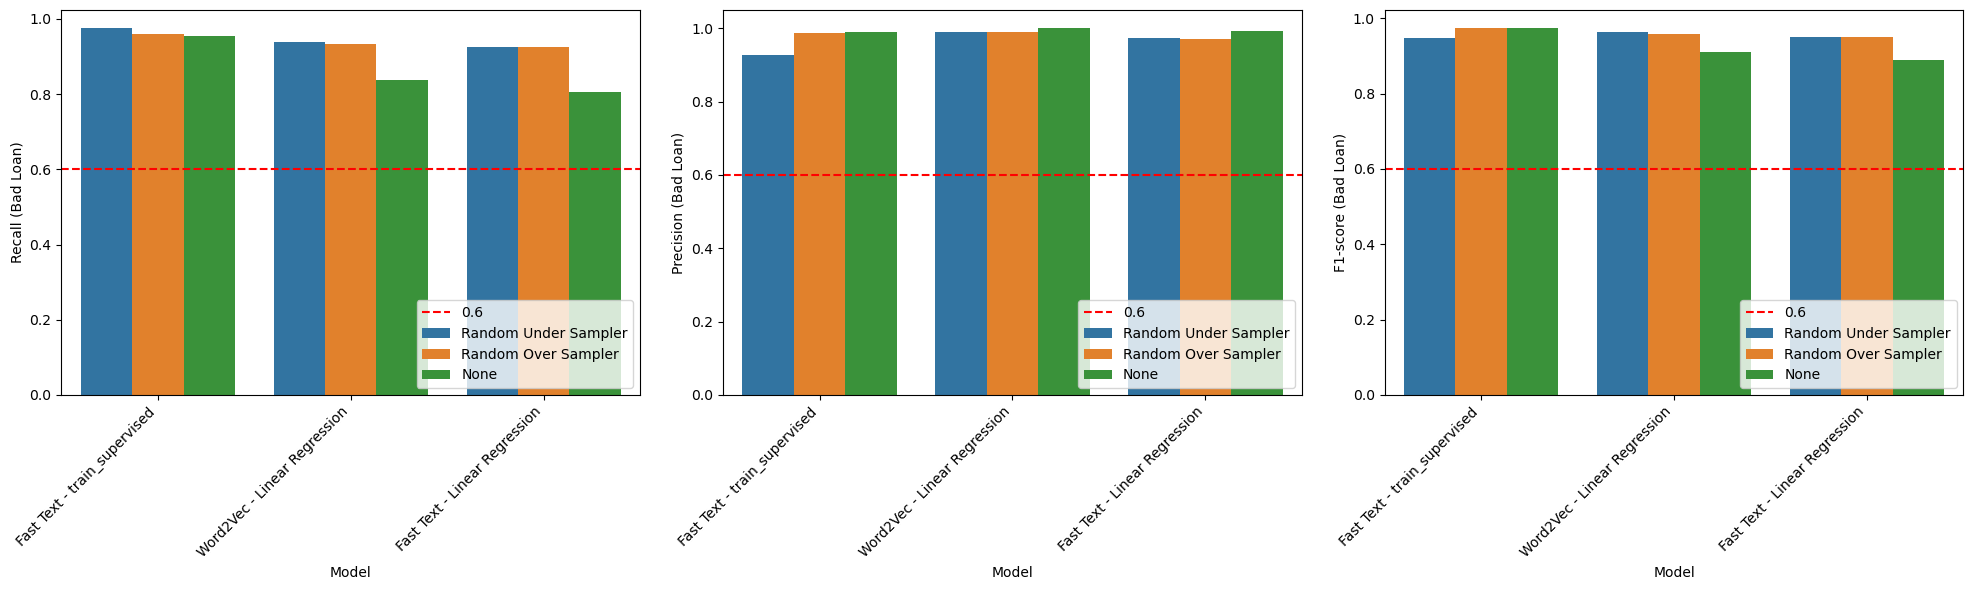

In [65]:
# Sort the DataFrame by recall_2
mean_metrics_sorted = df4_1_median.sort_values(by='recall_2', ascending=False)

# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the barplot for recall_2
plt.subplot(1, 3, 1)
ax1 = sns.barplot(data=mean_metrics_sorted, x='model', y='recall_2', hue='data balancing technique')
# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')
# Set labels and title
plt.xlabel('Model')
plt.ylabel('Recall (Bad Loan)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Show legend on the top left corner
plt.legend(loc='lower right')

# Plot the barplot for precision_2
plt.subplot(1, 3, 2)
ax2 = sns.barplot(data=mean_metrics_sorted, x='model', y='precision_2', hue='data balancing technique')
# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')
# Set labels and title
plt.xlabel('Model')
plt.ylabel('Precision (Bad Loan)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Show legend on the top left corner
plt.legend(loc='lower right')

# Plot the barplot for f1-score_2
plt.subplot(1, 3, 3)
ax3 = sns.barplot(data=mean_metrics_sorted, x='model', y='f1-score_2', hue='data balancing technique')
# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')
# Set labels and title
plt.xlabel('Model')
plt.ylabel('F1-score (Bad Loan)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Show legend on the top left corner
plt.legend(loc='lower right')

# Show plot
plt.tight_layout()
plt.show()

In [70]:
df4_2 = df4[(df4['dataset'].isin(['Raw Data']))]

In [71]:
# Assuming combined_metrics is your DataFrame containing the mentioned columns
df4_2_median = df4_2.groupby(['dataset','model', 'data balancing technique']).median().reset_index()

In [72]:
# Assuming combined_metrics is your DataFrame containing the mentioned columns
df4_2_std = df4_2.groupby(['dataset','model', 'data balancing technique']).std().reset_index()

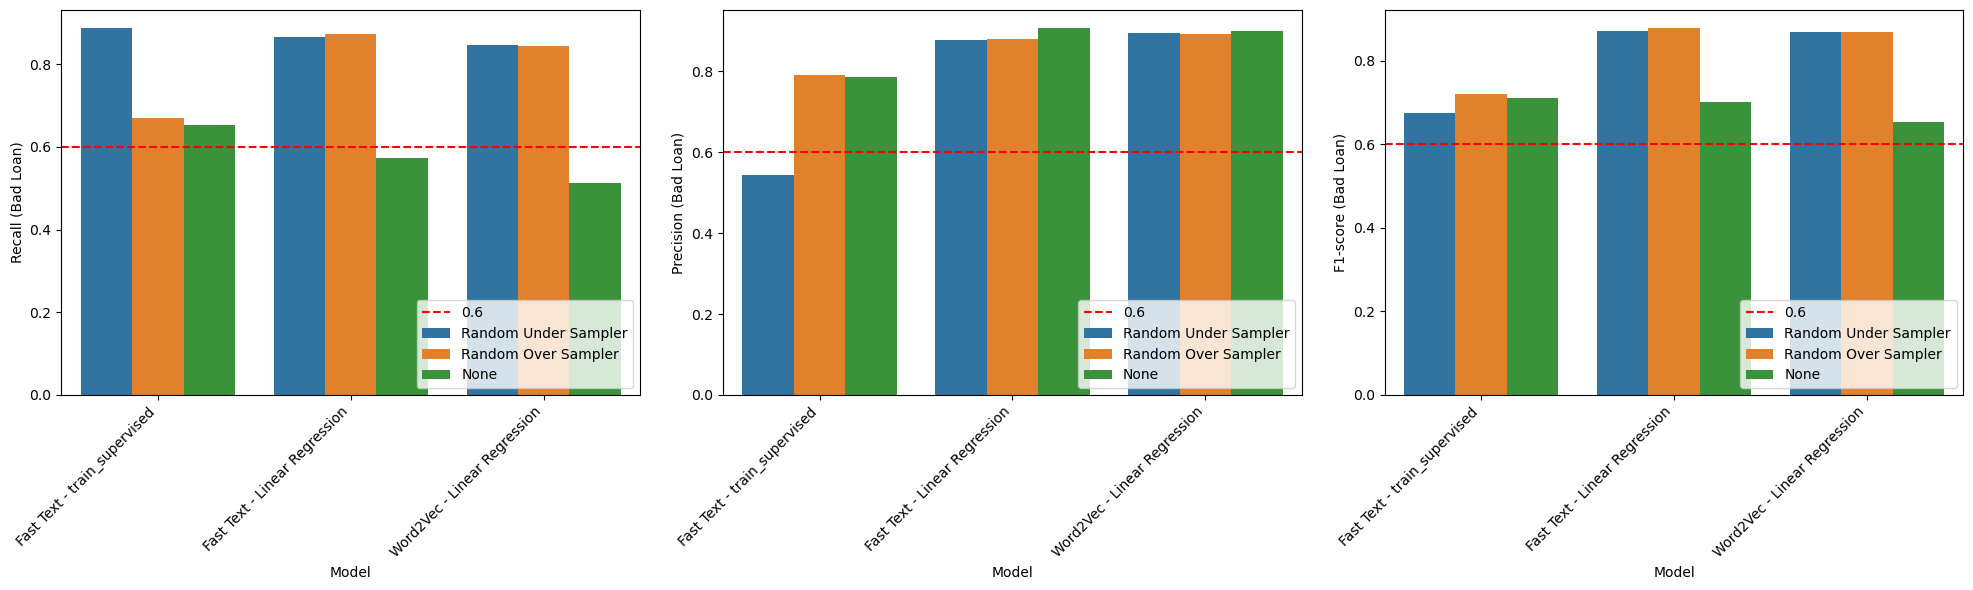

In [73]:
# Sort the DataFrame by recall_2
mean_metrics_sorted = df4_2_median.sort_values(by='recall_2', ascending=False)

# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the barplot for recall_2
plt.subplot(1, 3, 1)
ax1 = sns.barplot(data=mean_metrics_sorted, x='model', y='recall_2', hue='data balancing technique')
# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')
# Set labels and title
plt.xlabel('Model')
plt.ylabel('Recall (Bad Loan)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Show legend on the top left corner
plt.legend(loc='lower right')

# Plot the barplot for precision_2
plt.subplot(1, 3, 2)
ax2 = sns.barplot(data=mean_metrics_sorted, x='model', y='precision_2', hue='data balancing technique')
# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')
# Set labels and title
plt.xlabel('Model')
plt.ylabel('Precision (Bad Loan)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Show legend on the top left corner
plt.legend(loc='lower right')

# Plot the barplot for f1-score_2
plt.subplot(1, 3, 3)
ax3 = sns.barplot(data=mean_metrics_sorted, x='model', y='f1-score_2', hue='data balancing technique')
# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')
# Set labels and title
plt.xlabel('Model')
plt.ylabel('F1-score (Bad Loan)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Show legend on the top left corner
plt.legend(loc='lower right')

# Show plot
plt.tight_layout()
plt.show()